<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-2/blob/main/3.b.%20Convolutional%20Neural%20Network%20(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

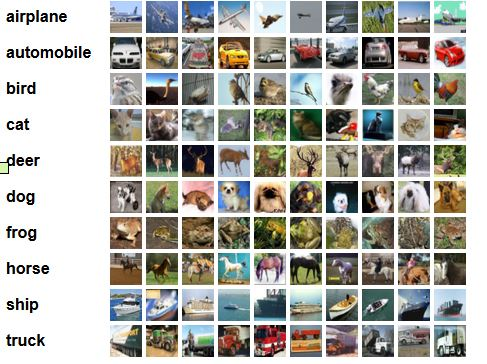

https://www.cs.toronto.edu/~kriz/cifar.html

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Max Train:  1.0 	 Min Train:  0.0
Max Test:  1.0 	 Min Test:  0.0


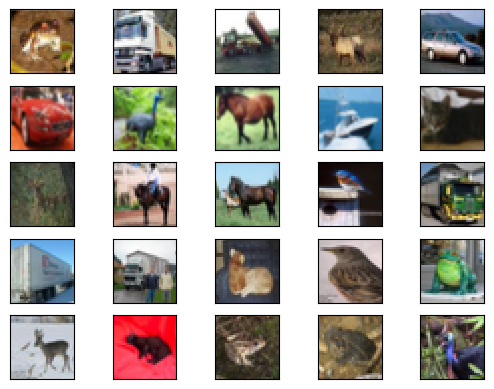

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.3263 - loss: 1.8270
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.5331 - loss: 1.3098
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.5887 - loss: 1.1509
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 93ms/step - accuracy: 0.6393 - loss: 1.0370
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 89ms/step - accuracy: 0.6684 - loss: 0.9499
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.6925 - loss: 0.8802
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.7081 - loss: 0.8365
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.7202 - loss: 0.8016
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.7350 - loss: 0.7549
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.7453 - loss: 0.7283


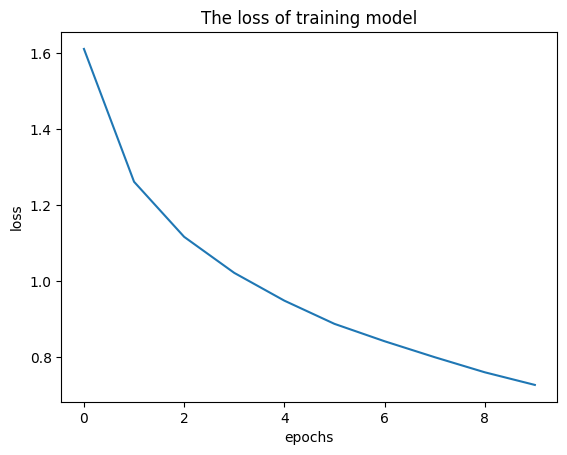

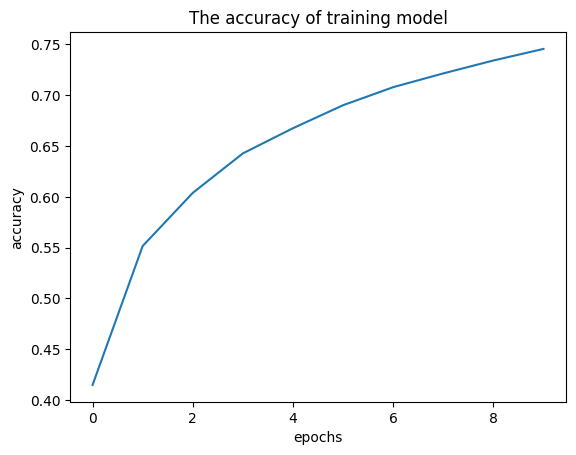

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6905 - loss: 0.8919
Test Loss:  0.896315336227417
Test accuracy:  0.6891999840736389


In [ ]:
import numpy as np   # برای کار با آرایه‌ها و محاسبات عددی
import matplotlib.pyplot as plt   # برای نمایش تصویر و رسم نمودار

from keras.datasets import cifar10   # بارگذاری دیتاست CIFAR-10
from keras.utils import to_categorical   # تبدیل برچسب‌ها به حالت one-hot
from keras.models import Sequential   # ساخت مدل به صورت پشت‌سر‌هم
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense   # لایه‌های مورد نیاز شبکه
from keras.optimizers import Adam   # الگوریتم بهینه‌سازی برای آموزش مدل

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()   # بارگذاری داده‌ها

train_images = train_images.astype('float32')   # تغییر نوع داده‌های آموزش به اعشاری
test_images = test_images.astype('float32')     # تغییر نوع داده‌های تست به اعشاری

# نرمال‌سازی داده‌ها بین 0 و 1
train_images = (train_images - train_images.min())/(train_images.max()-train_images.min())
test_images = (test_images - test_images.min())/(test_images.max()-test_images.min())

print("Max Train: ", train_images.max(), '\t',"Min Train: ", train_images.min())   # چاپ بیشترین و کمترین مقدار داده‌های آموزش
print("Max Test: ", test_images.max(), '\t',"Min Test: ", test_images.min())       # چاپ بیشترین و کمترین مقدار داده‌های تست

train_labels = to_categorical(train_labels, num_classes=10)   # تبدیل برچسب‌های آموزش به one-hot
test_labels = to_categorical(test_labels, num_classes=10)     # تبدیل برچسب‌های تست به one-hot

# نمایش 25 تصویر اول دیتاست
for i in range(25):
    plt.subplot(5,5,i+1)   # تعریف محل تصویر
    plt.xticks([])         # حذف محور X
    plt.yticks([])         # حذف محور Y
    plt.imshow(train_images[i,:,:,:])   # نمایش تصویر
plt.show()

Model = Sequential()   # ساخت مدل ترتیبی

Model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))   # لایه کانولوشن اول
Model.add(MaxPooling2D((2,2)))   # لایه کاهش ابعاد (Pooling)
Model.add(Conv2D(64, (3,3), activation='relu'))   # لایه کانولوشن دوم
Model.add(MaxPooling2D((2,2)))   # لایه Pooling دوم
Model.add(Conv2D(64, (3,3), activation='relu'))   # لایه کانولوشن سوم

Model.add(Flatten())   # تبدیل داده‌ها به بردار خطی
Model.add(Dense(64, activation='relu'))   # لایه مخفی با 64 نورون
Model.add(Dense(10, activation='softmax'))   # لایه خروجی با 10 نورون (برای 10 کلاس)

# کامپایل کردن مدل
Model.compile(Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# آموزش مدل روی داده‌ها
h = Model.fit(train_images, train_labels, epochs=10, batch_size=64)

# رسم نمودار خطا
plt.plot(h.history['loss'])
plt.title('The loss of training model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# رسم نمودار دقت
plt.plot(h.history['accuracy'])
plt.title('The accuracy of training model')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Output_model = Model.predict(test_images, batch_size=64)   # پیش‌بینی احتمال کلاس‌ها برای تصاویر تست
Output_model = np.argmax(Output_model ,axis=1)   # پیش‌بینی کلاس نهایی (حیوان/شیء)
Score = Model.evaluate(test_images, test_labels, batch_size=64)    # ارزیابی مدل روی داده‌های تست

print("Test Loss: ", Score[0])    # چاپ خطای مدل روی داده‌های تست
print("Test accuracy: ", Score[1])   # چاپ دقت مدل روی داده‌های تست

